In [19]:
# load up relavent libraries
library(ggplot2)
library(dplyr)
library(devtools)
library(scales)
library(xlsx)
library(ggpubr)
library(cowplot)

theme_set(theme_classic() + theme(text = element_text(size=20, family = "sans")))
options(StringsAsFactors=FALSE)

clade_colors <- c("#E64B35FF","#4DBBD5FF","#00A087FF")

# Microscopy p-values

In [20]:
p.df <- read.table("../data/microscopy_pvals.txt",h=T)
head(p.df)

,pvals,assay
,<dbl>,<fct>
1,1.379948e-01,MEAN_length
2,2.392338e-02,MEAN_width_std
3,3.035005e-01,MEAN_area
4,1.686993e-01,MEAN_TRITC_mean
5,7.182470e-01,MEAN_FITC_mean
6,1.790412e-05,MEAN_CFP_mean


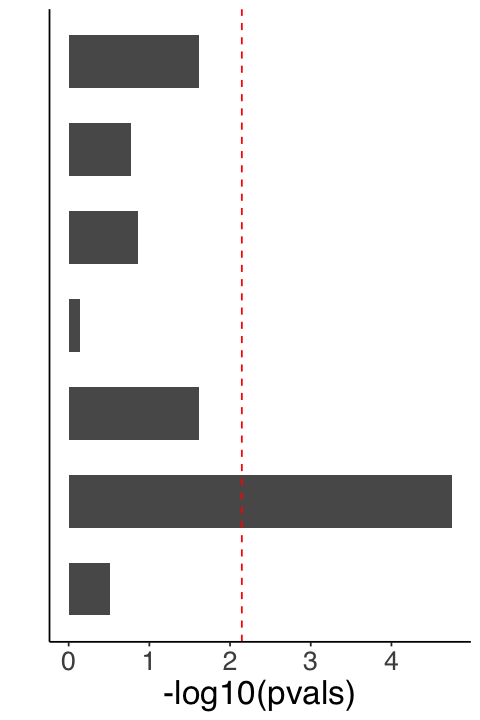

In [21]:
reorderfeature<- c(p.df$assay[1:5],p.df$assay[7],p.df$assay[6])
p <- ggplot(data=p.df %>% mutate(feature=factor(assay, levels=rev(reorderfeature))) , aes(x=assay, y=-log10(pvals))) +
  geom_bar(stat="identity",width=.6) 
p <- p + geom_hline(yintercept=-log10(0.05/7), linetype="dashed", color = "red")

options(repr.plot.width=4, repr.plot.height=6)

p + coord_flip() + xlab("") + #+ scale_y_discrete(expand=c(0,0)) 
    theme(axis.text.y=element_blank(),axis.ticks.y=element_blank())

# violion plot of CFP (F420-ox)

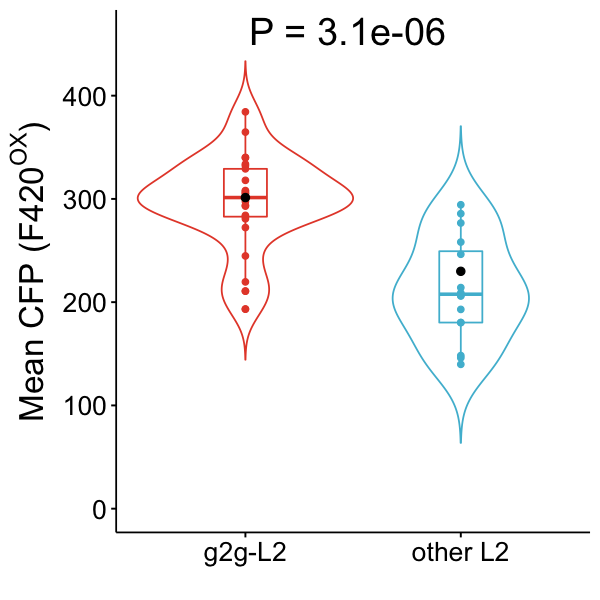

In [40]:
cfp <- read.table("../data/mean_CFP.txt",h=T,sep="\t")
pCFP <- ggviolin(cfp, x = "genotype", y = "MEAN_CFP_mean",
 add = c("boxplot","point"),
            color="genotype",palette=c(clade_colors[1],clade_colors[2]))



pCFP <- pCFP + stat_compare_means(label.x = 1.2,label.y = 450,size=8,aes(label = paste0("P = ", ..p.format..))) +
  ylim(0,460)

pCFP <- pCFP + xlab("") + ylab(expression(paste("Mean CFP (F",420^OX,")")))+
 font("ylab", size = 20) + 
 font("xy.text", size = 16) +
  theme(legend.position="none")


pCFP <- pCFP + geom_point(data = cfp %>% filter(Mtb.strain %in% c(7107,8066)),
                                             aes(x=genotype,y=MEAN_CFP_mean),
                 size=2)

options(repr.plot.width = 5, repr.plot.height = 5)

pCFP +  theme(axis.text.x = element_text(
                           size=16))